In [1]:
# imports
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [9, 6]
matplotlib.rcParams['font.size'] = 11
import numpy as np

# Vibrational mode
The vibrational mode will be the energy difference between the lasers.
This works out to around 1340 cm$^{-1}$.
There is a raman feature at 1350 cm$^{-1}$, this will be the mode excited by the raman transitions to get a population in the vibrational state.

(Note, this is actually the Raman spectrum of perfluorotetracene, however it is treated here as that of regular tetracene for this exercise.)

1339.3108893024291


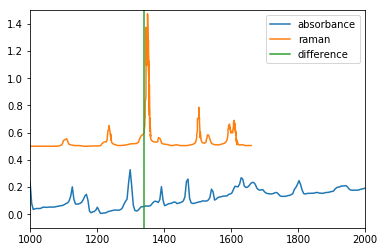

In [38]:
diff = 1e7/514 - 1e7/552
print(diff)

x,y,*_ = np.genfromtxt('nist_tetracene.jdx', skip_header=20, skip_footer=2).T
plt.plot(x,np.log10(1/y), label='absorbance')
x,y,*_ = np.genfromtxt('pFtetraceneRaman.csv', delimiter=',').T
plt.plot(x,y+.5, label='raman')
plt.axvline(diff, c='C2', label='difference')
plt.xlim(1000, 2000)
plt.ylim(-0.1, 1.5)
plt.legend()

# Energy of vibronic progression

The energy of the vibronic progression is closer to 1390 cm$^{-1}$.
The feature appears sharply in the absorbance spectrum, but only really weakly in the raman spectrum.

# WMEL

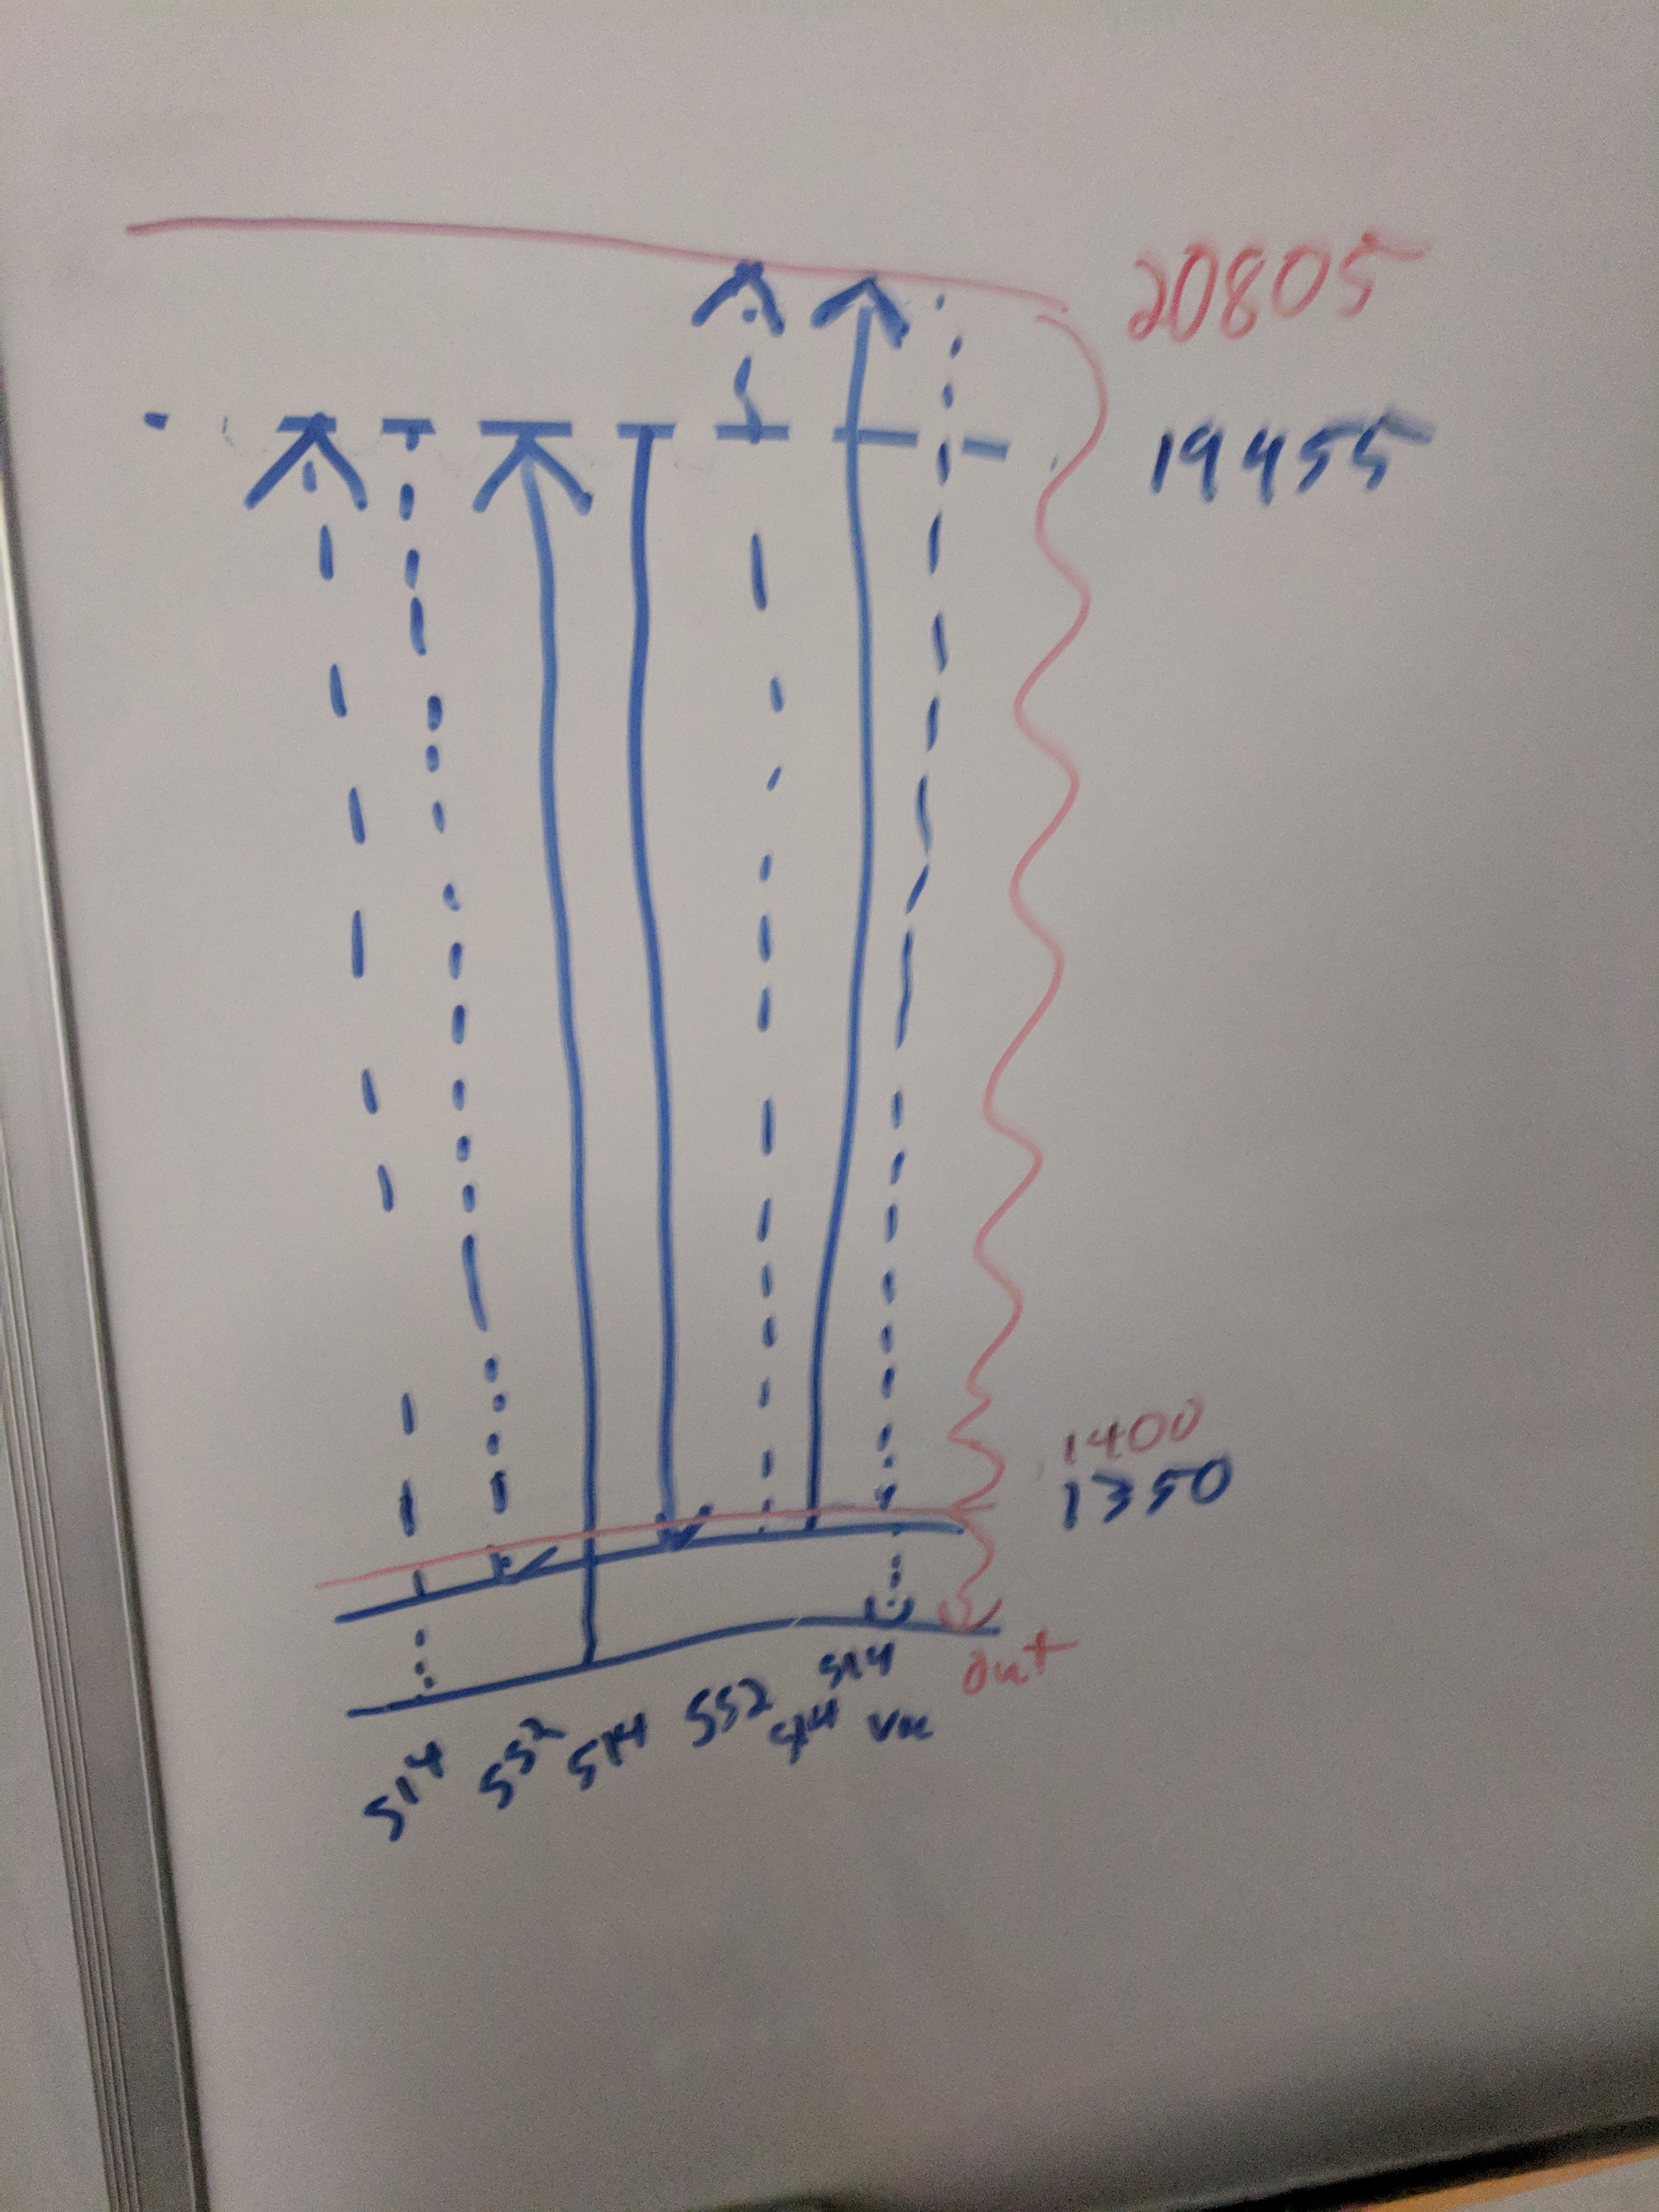

In [56]:
from IPython.display import Image
Image('WMEL.jpg')

# Fluorescence in abscense of 552 beam

No, there is no absorption at 514 nm, and thus no fluorescence can occur.
514 nm is too low energy to hit the excited electronic state

# Fluorescence if both beams present

Yes, the difference between the two beams (And thus the energy of the raman excited population) is enough to make the 514 nm beam get to the excited electronic state.

# Design a system
An argon Ion laser is split with a 75/25 (transmit/reflect) beamsplitter.
The reflected beam is then used to pump a R6G dye laser

Silver mirors (of relatively arbitrary distance, since thes are continuous wave lasers, and assuming collumnated out of the lasers themselves.

A turning mirror directs both beams through a 10cm focal length lens.
At the focus, a 1 mm cuvette with the sample is placed.
The excitation beams are then blocked by a beam block.

Fluorescence is detected at a 90 degree angle from teh excitation beams, collected with a 10 cm diameter, 4 cm focal length lens placed 5 cm from the beam waist.
This will produce an image 20 cm away from the lens, where the entrance slit to the monochromator is located. 

The monochromator has a 15 cm focal length and be about an f/4.
The grating is 1200 lines/mm blazed for 500 nm.

Additionally, both lines have choppers so that the signal can be modulated (and observe the differences between having each laser individually, as well as both blocked and both passing)

The PMT should have a gain of 1e6

Signals are digitized using a NI 6251 DAQ, and monitored using an oscilloscope.

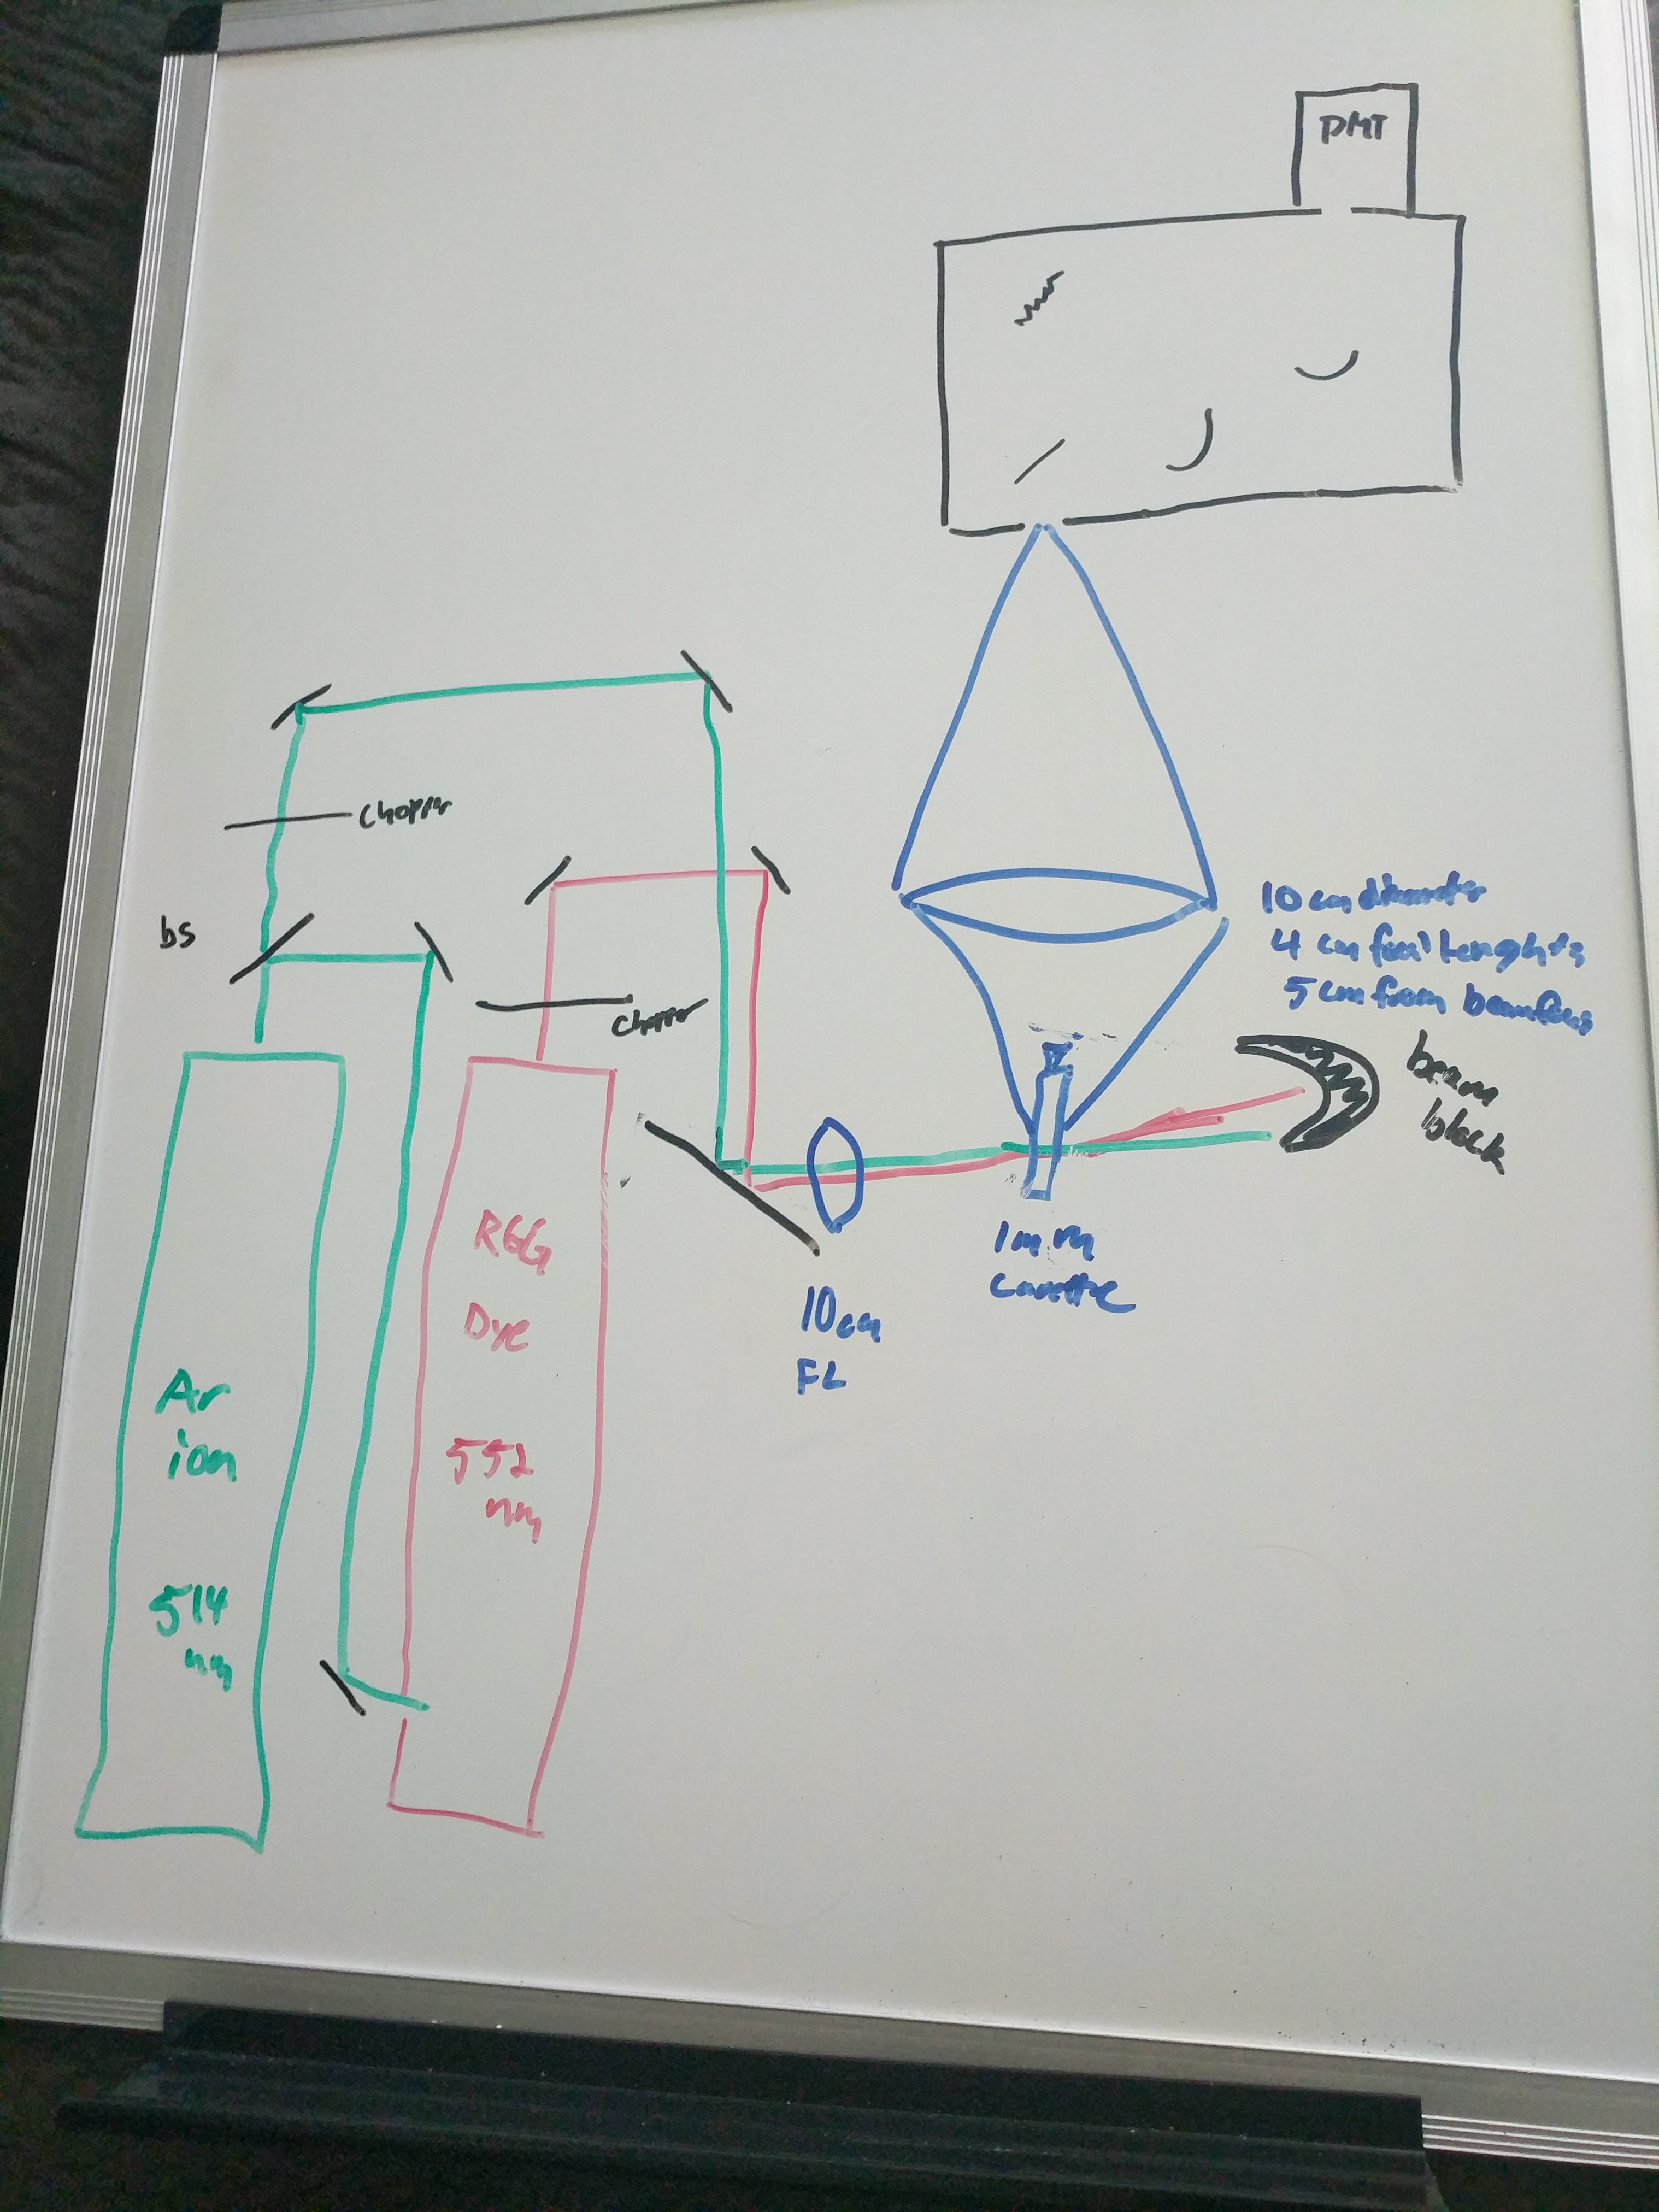

In [95]:
Image('system.jpg')

# Power of dye laser

In [70]:
pump_pow = 4  # W
pump_rad = 3e-2  # m
pump_wavelength = 514.5e-9  # m
focal_length = 3e-2  # m
dye_conc = 4e-4  # M
dye_thick = 0.2e-3  # m
out_wavelenth = 600e-9  # m
rho_cav_loss = 0.2  # dimless
tau_sing = 1e-8  # s
tau_vib = 1e-12  # s
reflectivity = 0.98  # dimless
absorbance = 0.0  # dimless
transmission = 1 - reflectivity - absorbance  # dimless
sigma_s = 1.25e-20  # m^2
sigma_p = 1.30e-20  # m^2

h = 6.626068e-34  # J s
c = 3e8  # m/s

rho = -np.log(reflectivity) + rho_cav_loss  # dimless
print(rho)

NA = 6.022e23  # avogadro, molecules/mol
number_density = dye_conc * NA * 1e3  # number/m^3

pump_pow = 5  # W
n_out = transmission * (pump_pow * pump_wavelength / h / c *
                        (dye_thick * number_density * sigma_s - rho)
                        / rho / sigma_s - 1/tau_sing / sigma_s)
dye_pow = n_out * h * c / out_wavelenth * sigma_s
print(n_out * h * c / out_wavelenth * sigma_s)

0.22020270731751948
0.14875506412436704


# Size/intensity of excitation beams

In [71]:
# Given an initial beam waist of 1 cm for each beam, and that the beams are well columnated coming out of the lasers
z_c = 1000
xo = 1000
f = 10
focus_waist = 1 / np.sqrt((1 - xo / f)**2 + (z_c/f)**2)
print(focus_waist, 'cm, beam waist')

area = np.pi * focus_waist ** 2
power = np.array([15, dye_pow])
intensity = power/area
print(intensity, 'W/cm^2')

0.007106511090102073 cm, beam waist
[94542.81084488   937.58145932] W/cm^2


# Derive $\rho_{vv}$ equation

There are two pathways to get the vibrational population (ignoring pathways which have an intermediate population state).

$gg \rightarrow eg \rightarrow vg \rightarrow ve \rightarrow vv$

$\rho_{eg}^{(1)} = \frac{\mu E_1}{2\hbar\Delta_{eg}}\rho_{gg}$

$\rho_{vg}^{(1)} = -\frac{\mu^2 E_1E_2}{4\hbar^2\Delta_{eg}\Delta_{vg}}\rho_{gg}$

$\rho_{ve}^{(1)} = \frac{\mu^3 E_1^2E_2}{8\hbar^3\Delta_{eg}\Delta_{vg}\Delta_{ve}}\rho_{gg}$

$\rho_{vv}^{(1)} = -\frac{\mu^4 E_1^2E_2^2}{16\hbar^4\Delta_{eg}\Delta_{vg}\Delta_{ve}\Delta_{vv}}\rho_{gg} = -\frac{\mu^4 E_1^2E_2^2}{16\hbar^4(\omega_{eg} - \omega_1 - i\Gamma_{eg})(\omega_{vg} - \omega_1 + \omega_2 - i\Gamma_{vg})(\omega_{ve} - 2\omega_1 + \omega_2 - i\Gamma_{ve})(-i\Gamma_{vv})}\rho_{gg}$


$gg \rightarrow ge \rightarrow gv \rightarrow ev \rightarrow vv$

$\rho_{ge}^{(2)} = \frac{\mu E}{2\hbar\Delta_{ge}}\rho_{gg}$

$\rho_{gc}^{(2)} = -\frac{\mu^2 E_1E_2}{4\hbar^2\Delta_{ge}\Delta_{gv}}\rho_{gg}$

$\rho_{ev}^{(2)} = \frac{\mu^3 E_1^2E_2}{8\hbar^3\Delta_{ge}\Delta_{gv}\Delta_{ev}}\rho_{gg}$

$\rho_{vv}^{(2)} = -\frac{\mu^4 E_1^2E_2^2}{16\hbar^4\Delta_{ge}\Delta_{gv}\Delta_{ev}\Delta_{vv}}\rho_{gg} = -\frac{\mu^4 E_1^2E_2^2}{16\hbar^4(\omega_{ge} + \omega_1 - i\Gamma_{ge})(\omega_{gv} + \omega_1 - \omega_2 - i\Gamma_{gv})(\omega_{ev} + 2\omega_1 - \omega_2 - i\Gamma_{ev})(-i\Gamma_{vv})}\rho_{gg}$


$\rho_{vv} = \rho_{vv}^{(1)}+\rho_{vv}^{(2)} = -\frac{\mu^4 E_1^2E_2^2}{16\hbar^4(\omega_{eg} - \omega_1 - i\Gamma_{eg})(\omega_{vg} - \omega_1 + \omega_2 - i\Gamma_{vg})(\omega_{ve} - 2\omega_1 + \omega_2 - i\Gamma_{ve})(-i\Gamma_{vv})}\rho_{gg}-\\\frac{\mu^4 E_1^2E_2^2}{16\hbar^4(\omega_{ge} + \omega_1 - i\Gamma_{ge})(\omega_{gv} + \omega_1 - \omega_2 - i\Gamma_{gv})(\omega_{ev} + 2\omega_1 - \omega_2 - i\Gamma_{ev})(-i\Gamma_{vv})}\rho_{gg}$

$\rho_{vv} = -\frac{\mu^4 \pi^2 I_1I_2}{2c\hbar^4(\omega_{eg} - \omega_1 - i\Gamma_{eg})(\omega_{vg} - \omega_1 + \omega_2 - i\Gamma_{vg})(\omega_{ve} - 2\omega_1 + \omega_2 - i\Gamma_{ve})(-i\Gamma_{vv})}\rho_{gg}-\\\frac{\mu^4 \pi^2 I_1I_2}{2c\hbar^4(\omega_{ge} + \omega_1 - i\Gamma_{ge})(\omega_{gv} + \omega_1 - \omega_2 - i\Gamma_{gv})(\omega_{ev} + 2\omega_1 - \omega_2 - i\Gamma_{ev})(-i\Gamma_{vv})}\rho_{gg}$

# Calculate $\rho_{vv}$ value

In [79]:
mu = 1e-18
I_514, I_552 = intensity
hbar = 1.0545716e-27

w_1 = 1e7 / 514 * 2*np.pi
w_2 = 1e7 / 552 * 2*np.pi

G_ge = 30 * 2 * np.pi
G_ee = 2 * G_ge 
G_gv = 5 * 2 * np.pi
G_vv = 2 * G_gv
G_ev = (G_ee + G_vv)/2

w_e = 1e7 / 514 * 2*np.pi
w_v = 1350 * 2*np.pi
w_g = 0

w_eg = w_e - w_g
w_ge = -w_eg
w_ev = w_e - w_v
w_ve = -w_ev
w_vg = w_v - w_g
w_gv = -w_vg

rho_gg = 1.

D_ge = w_ge - w_1 - 1j * G_ge
D_eg = w_eg + w_1 - 1j * G_ge
D_gv = w_gv - w_1 + w_2 - 1j * G_gv
D_vg = w_vg + w_1 - w_2 - 1j * G_gv
D_ev = w_ev - 2 * w_1 + w_2 - 1j * G_ev
D_ve = w_ve + 2 * w_1 - w_2 - 1j * G_ev

D_vv = -1j * G_vv

factor = mu ** 4 * np.pi ** 2 * I_514 * I_552 / (2 * 3e10 * hbar ** 4) * rho_gg

term = -1/(D_eg * D_vg * D_ve * D_vv) - 1/(D_ge * D_gv * D_ev * D_vv)

rho_vv = factor * term

print(rho_vv)

(8.408813669821142e+16+0j)


# Excited vibrational population

In [82]:
sigma_vv = rho_vv * hbar ** 2 * w_1 * 1_2
print(np.real(sigma_vv), 'cm^2')

1.3717812655396654e-31 cm^2


# S1 population

# Rate of fluorescence

In [87]:
fl_rate = 1e5

# Wavelength of monochromator and slit width
I would tune the monochromator to the first peak of the fluorescence spctrum (right at 480 nm, 20833 cm$^{-1}$). 
This peak is spectrally isolated from the excitation pulses, making scatter less of a hazard for detection (the other two peaks in the fluorescence spectrum coincide closely with the excitation pulses.
While the fluorescence is not directional, and thus the excitation beams can be spatially isolated, scatter would still be a problem.

Since we need to be able to spectrally isolate the peak of interest against the other fluorescence peaks and scatter from the excitations, say, 100 microns.

# Fraction of fluorescence

In [88]:
frac = np.pi * 5 ** 2 / (4 * np.pi * 5 ** 2)
print(frac)

0.25


# Count rate of photomultiplier

In [92]:
signal = fl_rate * frac * .9
print(signal)

22500.0


# Able to detect fluorescence signal

Yes, that amount of signal is well above background noise.

# Signal for single molecule

In [94]:
excitation_vol = area * .1
conc = 1e-3 * 6.022e23 / 1000 # molecules per mL
N = excitation_vol * conc
print(N)

print(signal/N)

9554401777646.447
2.35493550759412e-09


# Does the estimate make sense

That estimate is low, but then again, a single molecule will not give nearly as much signal as the bulk.

# Type of cavity
Since single molecule spectroscopy is the goal, a small excitation area in the sample cell is a good thing. thus, I would go with a spherical cavity.

# Radii of curviture/distance

I would choose 4 cm radii of curvature spaced 4 cm from the sample cell.

The total is then 8 cm for the cavity. This gives a cavity that is constructive for both excitation beams.

# Coating specification

The coating should have high reflectance, say 99% for both 514 and 552 nm light.

# Amount of improvement
Since both lasers are being amplified with high reflectivity, the intensity will be amplified by several orders of magnitude for each.
Thus, 10-12 OOM may be achieved

# Could you do single molecule detection

If indeed 10-12 OOM were achived with a cavity, yes, single molecule detection is a possiblility.